# 6 Isocontours of Normal Distributions

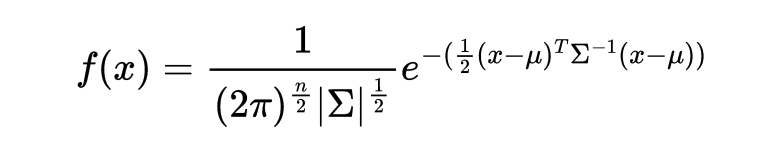

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [2]:
def contour(mu, sigma, mu_2=np.array([]), sigma_2=np.array([]), n=2):
    """
    Calculate the probability of a density function (PDF)

    Parameters:
    - x: numPy array of x variables
    - sigma: numPy array (matrix) of covariances
    - mu: numpy array of mu
    - n: default variable for no. of dimensions

    Returns: 
    The value of the PDF at x
    """

    # Define the grid
    x_range = np.linspace(-4, 5, 50)
    y_range = np.linspace(-5, 9, 50)
    X, Y = np.meshgrid(x_range, y_range)

    if len(sigma_2) == 0 and len(mu_2) == 0:
        # Calculate Z values (PDF) for each (x, y) in the grid
        Z = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                x = np.array([X[i, j], Y[i, j]])
                norm_factor = 1 / (((2 * np.pi)**(n/2)) * (np.linalg.det(sigma)**(1/2)))
                exponent = -(1/2)*((x - mu).T @ np.linalg.inv(sigma) @ (x - mu))
                pdf_value =  norm_factor * np.exp(exponent)
                Z[i, j] = pdf_value  # mu_1[0] to convert it to 1D array if needed
    else:
        Z = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                x = np.array([X[i, j], Y[i, j]])
                norm_factor_1 = 1 / (((2 * np.pi)**(n/2)) * (np.linalg.det(sigma)**(1/2)))
                exponent_1 = -(1/2)*((x - mu).T @ np.linalg.inv(sigma) @ (x - mu))
                pdf_value_1 =  norm_factor_1 * np.exp(exponent_1)

                norm_factor_2 = 1 / (((2 * np.pi)**(n/2)) * (np.linalg.det(sigma_2)**(1/2)))
                exponent_2 = -(1/2)*((x - mu_2).T @ np.linalg.inv(sigma_2) @ (x - mu_2))
                pdf_value_2 =  norm_factor_2 * np.exp(exponent_2)

                Z[i, j] = (pdf_value_1 - pdf_value_2) # mu_1[0] to convert it to 1D array if needed


    # Plot the contour plot
    contours = plt.contour(X, Y, Z, levels=5)
    plt.clabel(contours, inline=True, fontsize=10)
    plt.title('PDF Contour Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.autoscale(enable=True, tight=True)
    plt.show()

### 6.1

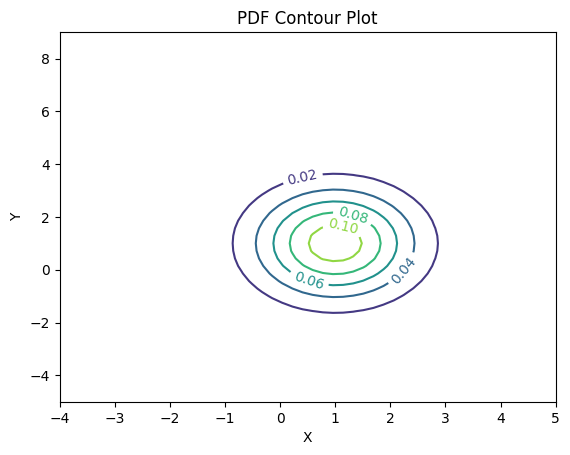

In [3]:
mu_1 = np.array([1,1])
sigma_1 = np.array([[1,0], [0,2]])
contour(mu_1,sigma_1)


### 6.2

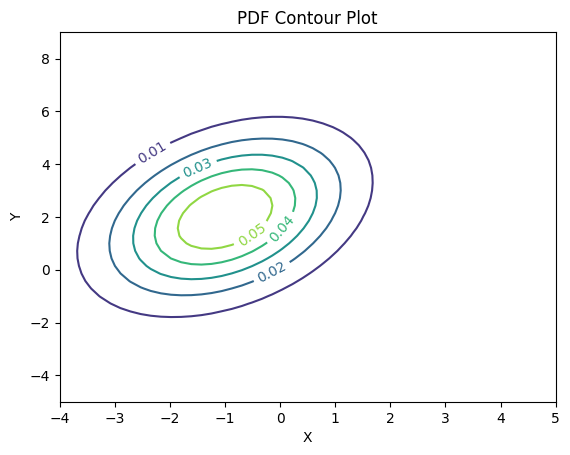

In [4]:
mu_2 = np.array([-1,2])
sigma_2 = np.array([[2,1], [1,4]])
contour(mu_2, sigma_2)



### 6.3

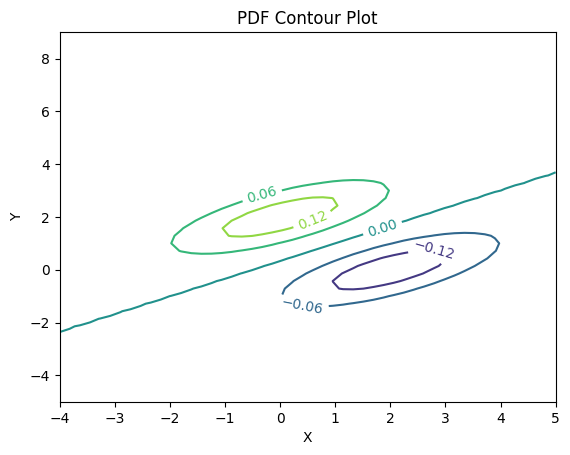

In [5]:
mu_1 = np.array([0,2])
mu_2 = np.array([2,0])
sigma_1, sigma_2 = np.array([[2,1], [1,1]]),  np.array([[2,1], [1,1]]) 
contour(mu_1, sigma_1, mu_2, sigma_2)


### 6.4

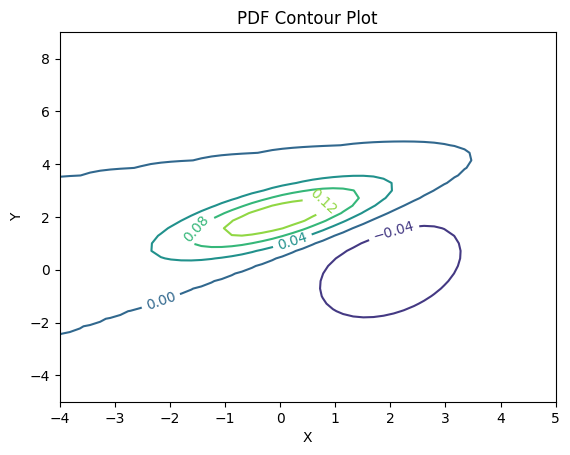

In [6]:
mu_1 = np.array([0,2])
mu_2 = np.array([2,0])
sigma_1, sigma_2 = np.array([[2,1], [1,1]]),  np.array([[2,1], [1,4]]) 
contour(mu_1, sigma_1, mu_2, sigma_2)

### 6.5

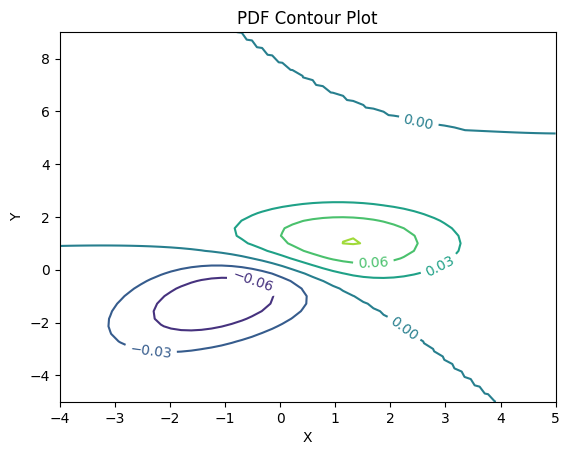

In [7]:
mu_1 = np.array([1,1])
mu_2 = np.array([-1,-1])
sigma_1, sigma_2 = np.array([[2,0], [0,1]]),  np.array([[2,1], [1,2]]) 
contour(mu_1, sigma_1, mu_2, sigma_2)

## 7 Eigenvectors of the Gaussian Covariance Matrix

In [8]:
from scipy.stats import norm

In [9]:

np.random.seed(42)
mean_x1 = 3
std_x1 = 3

# Define Random Variable x2's attributes
mean_x2 = 4
std_x2 = 2

sample_size = 100

# Define the random variable
X_1 = norm.rvs(loc=mean_x1, scale=std_x1, size=sample_size)
X_2 = (X_1 * 0.5) + norm.rvs(loc=mean_x2, scale=std_x2, size=sample_size)


### 7.1

In [10]:
# Mean in R2
mean_R2 = np.array([np.mean(X_1), np.mean(X_2)])
print(mean_R2)

[2.68846045 5.3888394 ]


### 7.2

In [11]:
# 2 x 2 covariance matrix
covariance_matrix = np.cov(X_1, X_2)
print(covariance_matrix)

[[7.42292904 3.00253936]
 [3.00253936 4.78474509]]


### 7.3

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)


[9.38335628 2.82431785]
[[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


### 7.4

In [13]:
fig = px.scatter(x=X_1, y=X_2, range_x=[-15, 15], range_y=[-15, 15], width=600, height=600)
# Set axis ranges to ensure the plot is square
fig.update_xaxes(range=[-15, 15], autorange=False)
fig.update_yaxes(range=[-15, 15], autorange=False)

# Annotations with arrows for eigenvectors
for i in range(len(eigenvalues)):
    fig.add_annotation(
        x=mean_R2[0] + eigenvectors[0, i] * eigenvalues[i], y=mean_R2[1] + eigenvectors[1, i] *eigenvalues[i],
        ax=mean_R2[0],
        ay=mean_R2[1],
        xref="x", yref="y",
        axref="x", ayref="y",
        text=f"Eigenvector {i+1}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="red"
    )

# Update the layout to make the plot square
fig.update_layout(
    autosize=False,
    width=700,
    height=700,
    title="Sample Points with Eigenvectors"
)

# Display the figure
fig.show()

### 7.5 

In [14]:
eigenvectors_transposed = eigenvectors.T
new_sample_points = (np.vstack((X_1, X_2)).T - mean_R2) @ eigenvectors_transposed

In [15]:
X1_rot = new_sample_points[:,0]
X2_rot = new_sample_points[:,1]

In [16]:
fig_rotated = px.scatter(x=X1_rot, y=X2_rot, range_x=[-15, 15], range_y=[-15, 15], width=200, height=200)
# Set axis ranges to ensure the plot is square
fig_rotated.update_xaxes(title='X1 rotated', range=[-15, 15], autorange=False)
fig_rotated.update_yaxes(title='X2 rotated',range=[-15, 15], autorange=False)

# Update the layout to make the plot square
fig_rotated.update_layout(
    autosize=False,
    width=700,
    height=700,
    title="Rotated Sample Points"
)

# Display the figure
fig_rotated.show()

# 8 Gaussian Classifiers for Digits & Spam

In [17]:
import os

In [18]:
os.chdir('/Users/christian/Documents/CS189/Homeworks/hw3/data')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/christian/Documents/CS189/Homeworks/hw3/data'

In [ ]:
#load mnist data
mnist = np.load(f"../data/mnist-data-hw3.npz")
mnist["training_data"]

print(pd.DataFrame(
    {"digits" : mnist["training_labels"]}
    ).digits.value_counts())
    
print(mnist["training_data"].shape)

1    6700
7    6273
3    6153
9    6009
2    5978
0    5902
6    5855
8    5848
4    5836
5    5446
Name: digits, dtype: int64
(60000, 1, 28, 28)


### 8.1

In [ ]:
# Reshape training data
mnist_training_flat = mnist['training_data'].reshape(mnist["training_data"].shape[0], -1)


In [ ]:
class PCA:
    def __init__(self, variance=0.80):
        self.data = None
        self.data_transformed = None
        self.variance = variance  # Proportion of variance to retain
        self.eigenvalues = None
        self.eigenvectors = None
        self.covariance_matrix = None

    def pca(self, data):
        self.data = data
        self.covariance_matrix = np.cov(self.data, rowvar=False)
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(self.covariance_matrix)
        idx = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]
        
        total_variance = np.sum(self.eigenvalues)
        variance_ratios = self.eigenvalues / total_variance
        cumulative_variance = np.cumsum(variance_ratios)
        num_components = np.where(cumulative_variance >= self.variance)[0][0] + 1
        
        self.data_transformed = self.data @ self.eigenvectors[:, :num_components]
        self.eigenvectors = self.eigenvectors[:, :num_components]


        # Print information
        print("Eigenvalues:", self.eigenvalues[:num_components])
        print("Number of components to retain:", num_components)
        print("Cumulative variance explained by these components:", cumulative_variance[num_components - 1])

        return self.data_transformed


Please note: Each index corresponds to the respective digit's mean, and covariance matrices. 
    i.e. means[0] contains the means for the digit 0, and covariances[0] corresponds to the covariance matrix for digit 0. 

In [ ]:
# Norm of training data
norm = np.linalg.norm(mnist_training_flat, axis=1)
norm[norm == 0] = 1  # Avoid division by zero
    
# Normalize training data
mnist_training_normalized = mnist_training_flat / norm[:, np.newaxis]

pca = PCA(.70)
# USE THIS DATA

# PCA on training data before any sort of split or shuffle
mnist_training_flat_pca = pca.pca(mnist_training_normalized)

Eigenvalues: [0.05618984 0.0439555  0.03522359 0.02964812 0.02781766 0.02452564
 0.01847492 0.0171859  0.01494258 0.01380838 0.01278279 0.01151573
 0.0104388  0.00977006 0.00908646 0.00863964 0.00774527 0.00746558
 0.00708066 0.0066398  0.00625987 0.00601463 0.00579498 0.00558008
 0.0054573  0.00522984 0.00482558 0.00475453 0.00450942]
Number of components to retain: 29
Cumulative variance explained by these components: 0.7043667101409804


### Build Covariance Matrix for Each Digit

In [ ]:
means = {}
covariances = {}

for digit in range(10):  # Loop through each digit class
    # Selecting the data for the current digit
    digit_training = mnist_training_flat_pca[mnist['training_labels'] == digit]
    
    # # Calculate the norms for each image
    # norms = np.linalg.norm(digit_training, axis=1)
    # norms[norms == 0] = 1  # Avoid division by zero
    
    # # Normalize the images
    # digit_training_normalized = digit_training / norms[:, np.newaxis]

    # Calculate the mean vector
    means[digit] = np.mean(digit_training, axis=0)
    
    # Calculate the covariance matrix
    covariances[digit] = np.cov(digit_training, rowvar=False)

In [ ]:
covariances

{0: array([[ 9.14430350e-03,  5.05856130e-03,  5.10777587e-03,
          2.63688645e-03,  2.44300274e-03, -5.65241956e-03,
          4.38026675e-03, -8.91115446e-03, -1.92242060e-05,
          2.88270403e-03,  2.03590128e-03,  9.43800860e-04,
         -2.59308224e-03, -6.53702013e-04,  1.17660573e-04,
         -6.91268401e-04, -1.27226248e-03,  3.32840516e-04,
         -1.34244446e-03, -3.07404586e-04,  3.83577107e-05,
          5.45047593e-04,  4.16401166e-04, -1.00227915e-03,
          7.27769214e-04, -1.83707384e-03, -3.66351859e-04,
         -8.42720879e-04, -3.80828093e-04],
        [ 5.05856130e-03,  1.19310140e-02,  5.72261231e-03,
          1.53567751e-03,  4.66388952e-03, -7.33447937e-03,
          3.26938347e-03, -9.22201626e-03, -3.92286284e-03,
         -1.16997055e-03,  3.20670840e-03,  1.00145934e-03,
         -3.67164357e-04,  2.12369800e-03,  1.64524898e-03,
          9.16003647e-05, -3.84592841e-03, -2.95174162e-03,
          4.50668931e-05,  3.28045241e-04, -2.5274366

### 8.2

In [ ]:
import seaborn as sns

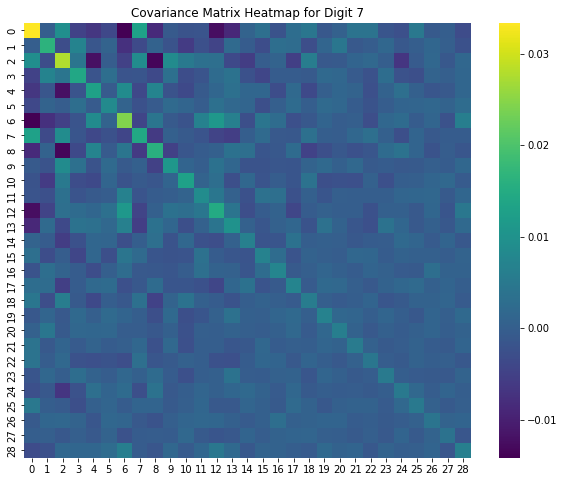

In [ ]:
digit = 7
plt.figure(figsize=(10,8));
sns.heatmap(covariances[7], cmap='viridis');
plt.title(f'Covariance Matrix Heatmap for Digit {digit}');

In the heatmap above I created a heatmap for the digit 7. The diaganol terms appear to have a higher variance than the non-diagonal terms. This means that the diagonal terms are the variances of each pixel, and the non-diagonal terms are the covariances between pixels. Much like the properties of a covariance matrix.

### 8.3

a)


### Compute Prior Probabilities & Pooled Covariance

In [ ]:
# compute prior probabilities
prior_probabilities = np.zeros(10)
total_samples = len(mnist['training_labels'])

# calculate prior probabilities
for i in range(10):
    prior_probabilities[i] = (np.sum(mnist['training_labels'] == i) / total_samples)

# Initialize the pooled covariance matrix with zeros
pooled_covariance = np.zeros(covariances[0].shape)

# Calculate the total number of samples minus the number of classes
N_minus_C = total_samples - 10

# Summing the weighted covariance matrices
for i in range(10):
    N_i = np.sum(mnist['training_labels'] == i)  # Number of samples in class i
    pooled_covariance += (N_i - 1) * covariances[i]

# Divide by total number of samples minus the number of classes to get the pooled covariance matrix
pooled_covariance /= N_minus_C


### Define Validation Set

In [ ]:
MNIST_features = mnist_training_flat_pca
MNIST_labels = mnist["training_labels"]
print(MNIST_features.shape)
print(MNIST_labels.shape)

(60000, 29)
(60000,)


In [ ]:
# Generate permutation indices from MNIST_training_data
indices = np.random.permutation(len(MNIST_features))

# Apply permutation to the training data and labels
MNIST_features_shuffled = mnist_training_flat_pca[indices]
MNIST_labels_shuffled = MNIST_labels[indices]

# Define the training data
X_train_MNIST = MNIST_features_shuffled[10_000:]
Y_train_MNIST = MNIST_labels_shuffled[10_000:]

# Set aside 10,000 images from the training set as a validation set
X_test_MNIST = MNIST_features_shuffled[:10_000]
Y_test_MNIST = MNIST_labels_shuffled[:10_000]

 # Transform Y_train_MNIST
Y_train_MNIST_flat = Y_train_MNIST.reshape(Y_train_MNIST.shape[0], -1)

# Transform Y_test_MNIST
Y_test_MNIST_flat = Y_test_MNIST.reshape(Y_test_MNIST.shape[0], -1)

# Flatten Y_train_MNIST_flat
Y_train_MNIST_flat = Y_train_MNIST_flat[:,0]

# Flatten Y_test_MNIST_flat
Y_test_MNIST_flat = Y_test_MNIST_flat[:,0]



### Normalize Training and Test Set

In [ ]:
sizes = [100, 200, 500, 1000, 2000, 5000, 10_000, 20_000]

# Calculate normalization once outside the loop
train_norms = np.linalg.norm(X_train_MNIST, axis=1)
train_norms[train_norms == 0] = 1  # Avoid division by zero
X_train_normalized = X_train_MNIST

test_norms = np.linalg.norm(X_test_MNIST, axis=1)
test_norms[test_norms == 0] = 1  # Avoid division by zero
X_test_normalized = X_test_MNIST

pooled_covariance_inv = np.linalg.pinv(pooled_covariance)

coefficients = {}
for digit in range(10):
    coefficients[digit] = np.dot(pooled_covariance_inv, means[digit])

temp = {}
errors = {digit: [] for digit in range(10)}

for size in sizes:
    X_test_subset = X_test_normalized[:size]
    Y_test_subset = Y_test_MNIST_flat[:size]

    for digit in range(10):
        # Select the samples of the current digit
        digit_indices = np.where(Y_test_subset == digit)[0]
        X_test_digit = X_test_subset[digit_indices]
        
        # Classify each sample
        predicted_labels = []
        for x in X_test_digit:
            scores = [np.dot(coefficients[d], x) - 0.5 * np.dot(means[d].T, np.dot(pooled_covariance_inv, means[d])) + np.log(prior_probabilities[d]) for d in range(10)]
            predicted_label = np.argmax(scores)
            predicted_labels.append(predicted_label)
        
        # Calculate classification error for this digit
        error = 1 - (sum(Y_test_subset[digit_indices] == predicted_labels) / len(digit_indices))
        errors[digit].append(error)


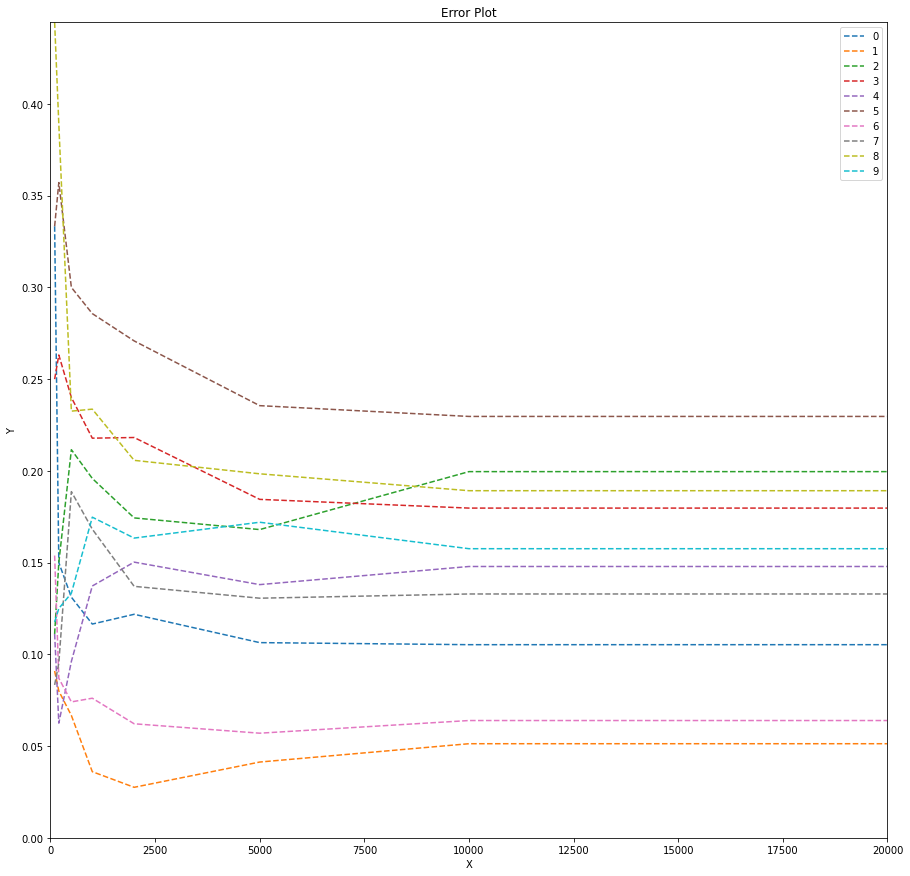

In [ ]:

plt.figure(figsize=(15, 15))
ylim = 0
for i in range(10):
    if max(errors[i]) > ylim:
        ylim = max(errors[i])

for i in range(10):
    plt.plot(sizes, errors[i], '--')

plt.title('Error Plot')

plt.xlabel('X')
plt.ylabel('Y')

# Set x and y limits to "zoom in" on a specific area
# Replace 'x_min', 'x_max', 'y_min', 'y_max' with your desired values
plt.xlim(0, max(sizes))
plt.ylim(0, ylim)

plt.autoscale(enable=False, tight=False)

plt.legend(range(10))
plt.show()




In [ ]:
print(f"Average cost: ", np.mean([max(errors[i]) for i in range(10)]))

Average cost:  0.23680678301451136


### Make Predictions on Test Set Using LDA

In [ ]:
x_test_flat = mnist['test_data'].reshape(mnist["test_data"].shape[0], -1)

# Calculate normalization once outside the loop
train_norms = np.linalg.norm(x_test_flat, axis=1)
train_norms[train_norms == 0] = 1  # Avoid division by zero
X_test_normalized = x_test_flat / train_norms[:, np.newaxis]

x_test_normalized_pca = X_test_normalized @ pca.eigenvectors

pooled_covariance_inv = np.linalg.pinv(pooled_covariance)
    
predictions = []

# Classify each sample
for x in x_test_normalized_pca:
    scores = [np.dot(coefficients[d], x) - 0.5 * np.dot(means[d].T, np.dot(pooled_covariance_inv, means[d])) + np.log(prior_probabilities[d]) for d in range(10)]
    prediction = np.argmax(scores)
    predictions.append(prediction)


In [ ]:
# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('digits_submission.csv', index_label='Id')


In [ ]:
results_to_csv(np.array(predictions))

### Kaggle Score & Username 8.4

Name: Christian Reyes Avina
Kaggle Score: .867
Kaggle Username: christianreyesavina